In [1]:
import os
import pandas as pd
import glob
import nltk
import string
import re #regular expression
import string
import time
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



C:\Users\lj.yew\AppData\Local\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Set path for new working directory
path = "C:/Users/lj.yew/511project/"

os.chdir(path)

# Check to see if current directory has changed
os.getcwd()


'C:\\Users\\lj.yew\\511project'

In [20]:
# csv files in the path 
folder = "z_uniqlo/"
files = glob.glob(path + folder + "*.csv") 

# defining an empty list to store  
# content 
data_frame = pd.DataFrame() 
content = [] 
filecheck = []

# checking all the csv files in the  
# specified path 
for filename in files: 
    
    # reading content of csv file 
    # content.append(filename) 
    df = pd.read_csv(filename,encoding='utf-8')
    file_id = filename.strip(path+folder)
    file_id = file_id[19:30]

    filecheck.append(file_id)
    
    df.insert(0,'postId',file_id)
    content.append(df) 
  
# converting content to data frame 
data_frame = pd.concat(content) 

# Create a new data frame to store data from selected columns
df_extract = pd.DataFrame(data_frame)

print(len(df_extract))
df_extract.head()

37578


,postId,User Id,User Name,Comment Id,Comment Text,Profile URL,Avatar URL,Publish Date
0,C--K9-NsKhT,3914240351,syxffql,18013413416566467,🔥🔥🔥,https://www.instagram.com/syxffql,https://instagram.fkul6-3.fna.fbcdn.net/v/t51....,"8/22/2024, 8:30:08 PM"
1,C--K9-NsKhT,1329437977,foto.je.nik,18455063731015288,Scalper where you at?,https://www.instagram.com/foto.je.nik,https://instagram.fkul6-2.fna.fbcdn.net/v/t51....,"8/22/2024, 8:31:12 PM"
2,C--K9-NsKhT,56885944175,nurinareza,18023001164109488,Lurving Andy’s jacket so much!!!❤️❤️❤️🙌🙌,https://www.instagram.com/nurinareza,https://instagram.fkul6-2.fna.fbcdn.net/v/t51....,"8/22/2024, 9:31:58 PM"
3,C--K9-NsKhT,1546782870,hisyamuddin.azhar,17981486720723749,Ineedit,https://www.instagram.com/hisyamuddin.azhar,https://instagram.fkul6-2.fna.fbcdn.net/v/t51....,"8/22/2024, 11:14:57 PM"
4,C--K9-NsKhT,181106611,ashrafekhart,18031462138993081,@ajim_jasni ejah so,https://www.instagram.com/ashrafekhart,https://instagram.fkul6-4.fna.fbcdn.net/v/t51....,"8/22/2024, 11:27:29 PM"


In [22]:
df_extract.to_csv('combined_UniqloDataset.csv',encoding='utf-8', index=False, mode='w')

In [ ]:
#------------------Text Pre-processing -----------

In [4]:
import contractions
from datetime import datetime
import contractions

#keep letters only
def keep_letters(text):
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    return text
    
# remove stopwords function
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return filtered_text

def remove_aliastag(text):
    output_token = []
    text_str = str(text)
    tokenized_text = text_str.split()
    for token in tokenized_text:
        if token.startswith('@'):
            token = ""  # Replace with empty string
        output_token.append(token)

    return " ".join(output_token)

def remove_hashtag(text):
    output_token = []
    tokenized_text = text.split()
    for token in tokenized_text:
        if token.startswith('@'):
            token = ""  # Replace with empty string
        output_token.append(token)

    return " ".join(output_token)

def seperate_datetime(text):
    date, time = text.split(", ")
    return date, time

In [5]:
# text-preprocessing
df_extract = pd.read_csv('combined_UniqloDataset.csv',encoding='utf-8') 
# Select specific columns from df_extract
df_comment = df_extract[['Comment Text', 'Publish Date']]
df_comment.dtypes


Comment Text    object
Publish Date    object
dtype: object

In [6]:
from datetime import datetime
from dateutil.parser import parse

def get_month(date_str):
    # Dictionary mapping months to seasons
    month_to_season = {
        1: 'Winter',
        2: 'Winter',
        3: 'Spring',
        4: 'Spring',
        5: 'Spring',
        6: 'Summer',
        7: 'Summer',
        8: 'Summer',
        9: 'Autumn',
        10: 'Autumn',
        11: 'Autumn',
        12: 'Winter'
    }

    # Strip date
    # date_obj = datetime.strptime(date_str, '%m/%d/%Y')
    date_obj = parse(date_str)

    # Extract month
    month = date_obj.month
    
    season = month_to_season.get(month)
    return season



In [7]:
df_comment = df_comment.copy()
df_comment['Date']=df_comment['Publish Date'].apply(lambda x: seperate_datetime(x)[0])
df_comment['Season']=df_comment['Date'].apply(lambda x:get_month(x))
df_comment.head()

,Comment Text,Publish Date,Date,Season
0,🔥🔥🔥,"8/22/2024, 8:30:08 PM",8/22/2024,Summer
1,Scalper where you at?,"8/22/2024, 8:31:12 PM",8/22/2024,Summer
2,Lurving Andy’s jacket so much!!!❤️❤️❤️🙌🙌,"8/22/2024, 9:31:58 PM",8/22/2024,Summer
3,Ineedit,"8/22/2024, 11:14:57 PM",8/22/2024,Summer
4,@ajim_jasni ejah so,"8/22/2024, 11:27:29 PM",8/22/2024,Summer


In [8]:
df_comment['Processed Text']=df_comment['Comment Text'].apply(lambda x: remove_aliastag(x))
df_comment['Processed Text']=df_comment['Processed Text'].apply(lambda x: remove_hashtag(x))
df_comment['Processed Text']=df_comment['Processed Text'].apply(lambda x: contractions.fix(x))
df_comment['Processed Text']=df_comment['Processed Text'].apply(lambda x: keep_letters(x))
df_comment['Processed Text']=df_comment['Processed Text'].apply(lambda x: x.lower())

# Drop empty 'msg_text_processed'
df_comment.dropna(subset=['Processed Text'], inplace=True)
# Keep only non-empty strings
df_comment = df_comment[df_comment['Processed Text'].apply(lambda x: isinstance(x, str) and x.strip() != '')] 

print(len(df_comment))
df_comment.head()

27474


,Comment Text,Publish Date,Date,Season,Processed Text
1,Scalper where you at?,"8/22/2024, 8:31:12 PM",8/22/2024,Summer,scalper where you at
2,Lurving Andy’s jacket so much!!!❤️❤️❤️🙌🙌,"8/22/2024, 9:31:58 PM",8/22/2024,Summer,lurving andy s jacket so much
3,Ineedit,"8/22/2024, 11:14:57 PM",8/22/2024,Summer,ineedit
4,@ajim_jasni ejah so,"8/22/2024, 11:27:29 PM",8/22/2024,Summer,ejah so
5,cant wait !🔥,"8/23/2024, 10:10:33 AM",8/23/2024,Summer,cannot wait


In [9]:
df_comment.drop(columns = ["Comment Text","Publish Date","Date"],inplace = True)
df_comment.head()


,Season,Processed Text
1,Summer,scalper where you at
2,Summer,lurving andy s jacket so much
3,Summer,ineedit
4,Summer,ejah so
5,Summer,cannot wait


In [10]:
df_spring = df_comment[df_comment['Season']=='Spring']
df_summer = df_comment[df_comment['Season']=='Summer']
df_autumn = df_comment[df_comment['Season']=='Autumn']
df_winter = df_comment[df_comment['Season']=='Winter']

df_spring.head()

,Season,Processed Text
11954,Spring,have winner announce
13108,Spring,are the minis available in india
13109,Spring,hi akswish unfortunately we have no specific...
13151,Spring,wow
13156,Spring,that is not the usa


In [10]:
#------------------Topic modelling -----------

In [11]:
# Find frequency of each word in a string in Python
# using dictionary.

def count(elements):
    # check if each word has '.' at its last. If so then ignore '.'
    if elements[-1] == '.':
        elements = elements[0:len(elements) - 1]

    # if there exists a key as "elements" then simply
    # increase its value.
    if elements in dictionary:
        dictionary[elements] += 1

    # if the dictionary does not have the key as "elements"
    # then create a key "elements" and assign its value to 1.
    else:
        dictionary.update({elements: 1})

# Declare a dictionary for whole CSV file
dictionary = {}

def wordCount(text):
    # split all the word of the string.
    list = text.split()

    # take each word from lst and pass it to the method count.
    for elements in list:
        count(elements)
        

In [12]:

df_wordcount = pd.DataFrame(df_comment['Processed Text'])
#iterate all rows to perform word count
for index,row in df_wordcount.iterrows():
    # Iterate through rows and copy data to df_new
        text = row['Processed Text']
        wordCount(text)

# Sort by values in descending order
sorted_word = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True))


In [13]:
import csv

# Specify the output CSV file name
output_file = "WordCount.csv"

# Write dictionary to CSV
with open(output_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Write header (optional)
    writer.writerow(["Key", "Value"])
    # Write data
    for key, value in sorted_word.items():
        writer.writerow([key, value])

print(f"Dictionary has been saved to {output_file}")


Dictionary has been saved to WordCount.csv


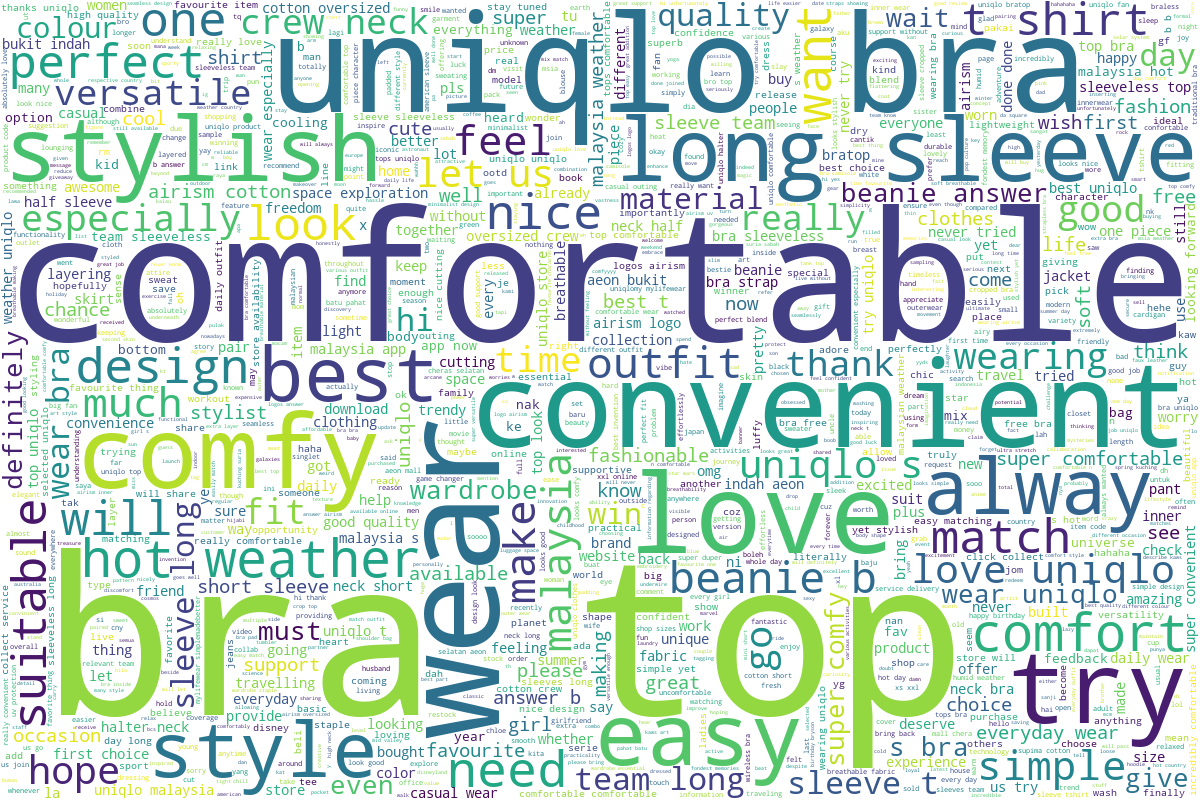

In [116]:
# Import the wordcloud library
from wordcloud import WordCloud
# join all_string the different processed titles together.
all_string = ''
all_string = ','.join(list(df_wordcount['Processed Text'].values))
# Create a WordCloud object
wordcloud = WordCloud(width=1200, height=800,background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(all_string)
# Visualize the word cloud
wordcloud.to_file("wordcloud.png")
wordcloud.to_image()

In [ ]:
####################################################

In [11]:
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from collections import Counter

# NLTK Stop words
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

stop_words = stopwords.words('english')

def tokenize_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
    

In [125]:
def TM_LDA(df):
    df.rename(columns={'Processed Text' : 'Processed_Text'},inplace = True)
    data = df.Processed_Text.values.tolist()
    data_words = list(tokenize_words(data))

    # remove stop words
    data_words = remove_stopwords(data_words)

    import gensim.corpora as corpora
    # Create Dictionary
    id2word = corpora.Dictionary(data_words)
    # Create Corpus
    texts = data_words
    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]

    from pprint import pprint
    # number of topics
    num_topics = 1
    # Build LDA model
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state = 100)
    # Print the Keyword in the 10 topics
    pprint(lda_model.print_topics())
    doc_lda = lda_model[corpus]
    return lda_model,data_words
    

In [126]:

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from collections import Counter

def lda_graph_subplot(lda_model,data_words,outputfile):
    topics = lda_model.show_topics(formatted=False)
    data_flat = [w for w_list in data_words for w in w_list]
    counter = Counter(data_flat)

    out = []
    max_word = 0
    max_weight = 0
    for i, topic in topics:
        for word, weight in topic:
            out.append([word, i , weight, counter[word]])
            if max_word < counter[word]:
                max_word = counter[word]
            if max_weight < weight:
                max_weight = weight


    df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

    # Plot Word Count and Weights of Topic Keywords
    fig, axes = plt.subplots(1,3,figsize=(18,12), sharey=True, dpi=160)
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
    for i, ax in enumerate(axes.flatten()):
        ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
        ax.tick_params(axis = 'x', labelsize=16)
        ax_twin = ax.twinx()
        ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
        ax.set_ylabel('Word Count', color=cols[i])
        ax_twin.set_ylim(0, max_weight); ax.set_ylim(0, max_word)
        ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=18)
        ax.tick_params(axis='y', left=False,labelsize = 14)
        ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
        ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

    fig.tight_layout(w_pad=2)    
    fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=28, y=1.05)
    plt.savefig(outputfile)
    plt.show()
    

In [119]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from collections import Counter

def lda_graph(lda_model,data_words,outputfile):
    topics = lda_model.show_topics(formatted=False)
    data_flat = [w for w_list in data_words for w in w_list]
    counter = Counter(data_flat)

    out = []
    max_word = 0
    max_weight = 0
    for i, topic in topics:
        for word, weight in topic:
            out.append([word, i , weight, counter[word]])
            if max_word < counter[word]:
                max_word = counter[word]
            if max_weight < weight:
                max_weight = weight


    df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

    # Plot Word Count and Weights of Topic Keywords
    fig, ax = plt.subplots(figsize=(16,12), sharey=True, dpi=160)
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
    #for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax.tick_params(axis = 'x', labelsize=16)
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i],fontsize=16)
    ax_twin.set_ylim(0, max_weight+0.05); ax.set_ylim(0, max_word+100)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=18)
    ax.tick_params(axis='y', which='both',labelsize = 16)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

    fig.tight_layout(w_pad=2)    
    fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=28, y=1.05)
    plt.savefig(outputfile)
    plt.show()
    

In [123]:
lda_overall = TM_LDA(df_comment)
lda_result = lda_overall[0]
dataWord = lda_overall[1]


[(0,
  '0.078*"comfortable" + 0.067*"bra" + 0.055*"uniqlo" + 0.037*"tops" + '
  '0.031*"wear" + 0.022*"love" + 0.022*"top" + 0.018*"convenient" + '
  '0.013*"stylish" + 0.008*"try"'),
 (1,
  '0.036*"bra" + 0.024*"wear" + 0.021*"tops" + 0.020*"comfy" + '
  '0.017*"comfortable" + 0.016*"convenient" + 0.014*"long" + 0.012*"sleeve" + '
  '0.011*"uniqlo" + 0.011*"easy"'),
 (2,
  '0.060*"bra" + 0.059*"top" + 0.030*"uniqlo" + 0.022*"comfortable" + '
  '0.022*"wear" + 0.015*"try" + 0.015*"beanie" + 0.012*"convenient" + '
  '0.012*"weather" + 0.010*"comfy"')]


C:\Users\lj.yew\AppData\Local\Temp\ipykernel_9492\1646687775.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


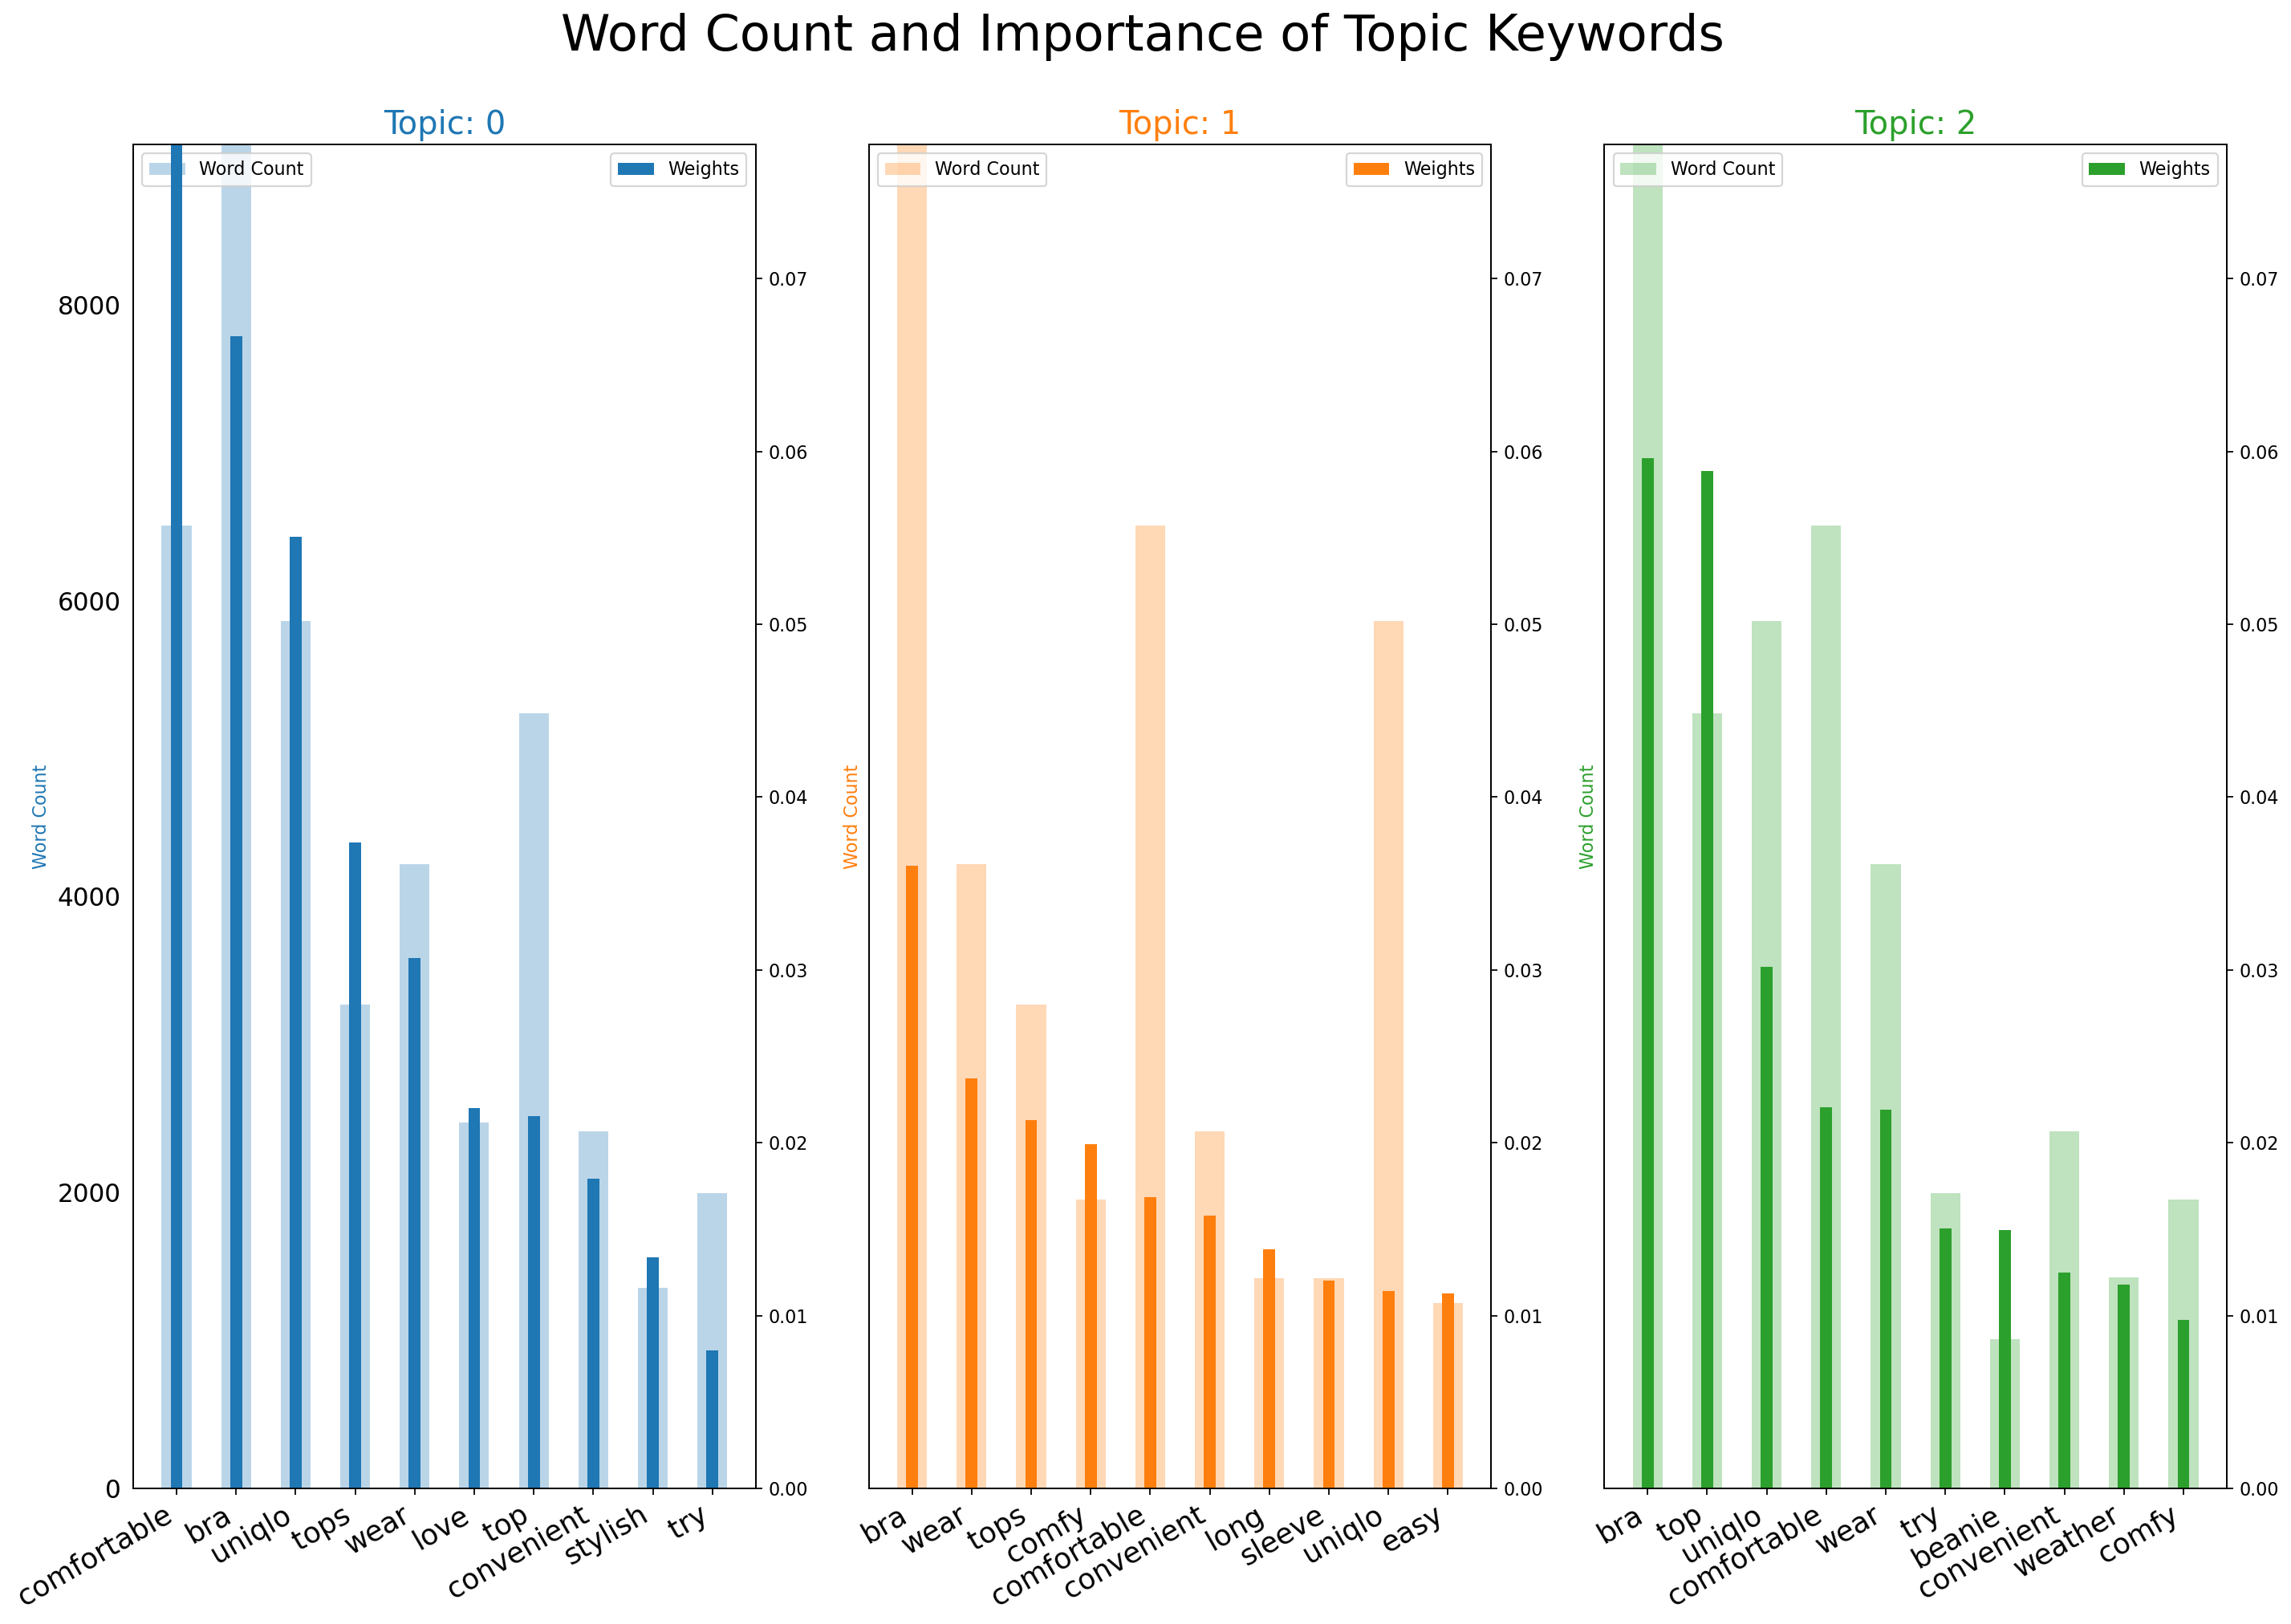

In [127]:
lda_graph_subplot(lda_result,dataWord,"AllComment.png")

In [107]:
lda_spring = TM_LDA(df_spring)
lda_result = lda_spring[0]
dataWord = lda_spring[1]

C:\Users\lj.yew\AppData\Local\Temp\ipykernel_9492\2068525536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Processed Text' : 'Processed_Text'},inplace = True)


[(0,
  '0.016*"uniqlo" + 0.015*"bra" + 0.014*"airism" + 0.009*"love" + 0.009*"wear" '
  '+ 0.008*"shirt" + 0.008*"top" + 0.008*"best" + 0.008*"comfortable" + '
  '0.007*"space"')]


C:\Users\lj.yew\AppData\Local\Temp\ipykernel_9492\2114999170.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


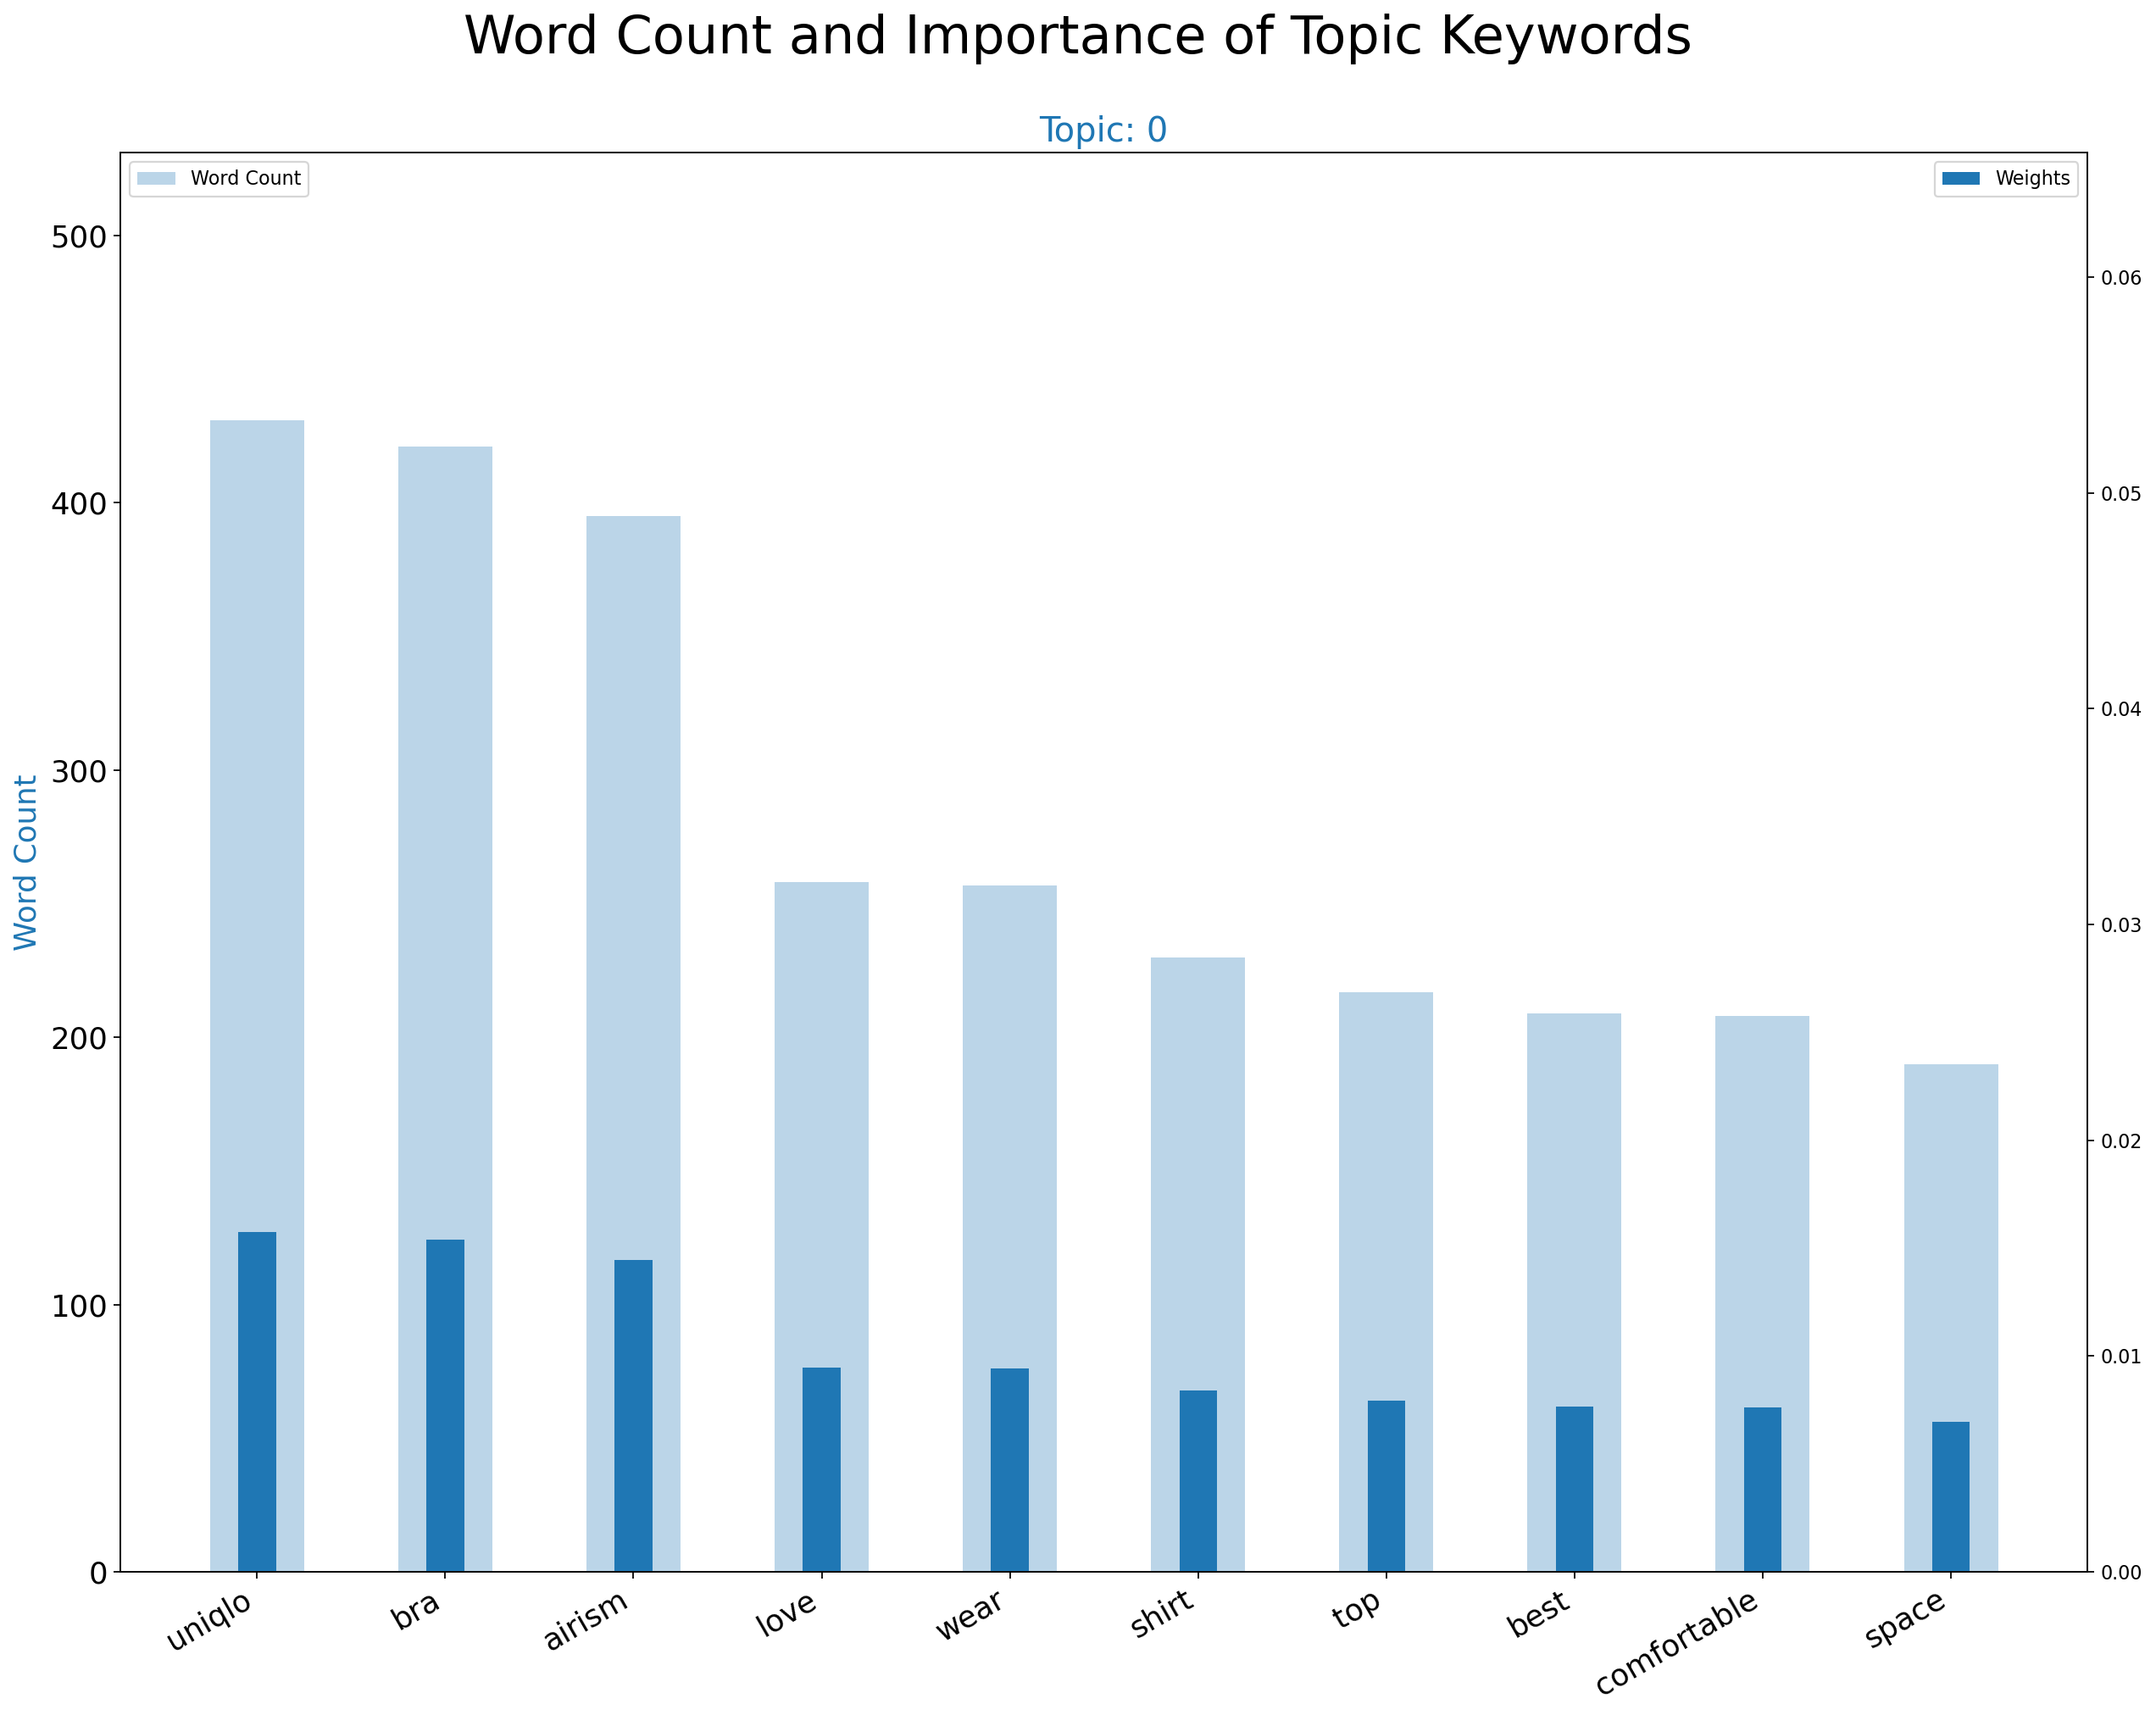

In [120]:
lda_graph(lda_result,dataWord,"Spring.png")

In [128]:
lda_summer = TM_LDA(df_summer)
lda_result = lda_summer[0]
dataWord = lda_summer[1]

C:\Users\lj.yew\AppData\Local\Temp\ipykernel_9492\2068525536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Processed Text' : 'Processed_Text'},inplace = True)


[(0,
  '0.068*"bra" + 0.050*"comfortable" + 0.038*"uniqlo" + 0.038*"top" + '
  '0.032*"wear" + 0.027*"tops" + 0.020*"convenient" + 0.015*"love" + '
  '0.012*"comfy" + 0.011*"weather"')]


C:\Users\lj.yew\AppData\Local\Temp\ipykernel_9492\2114999170.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


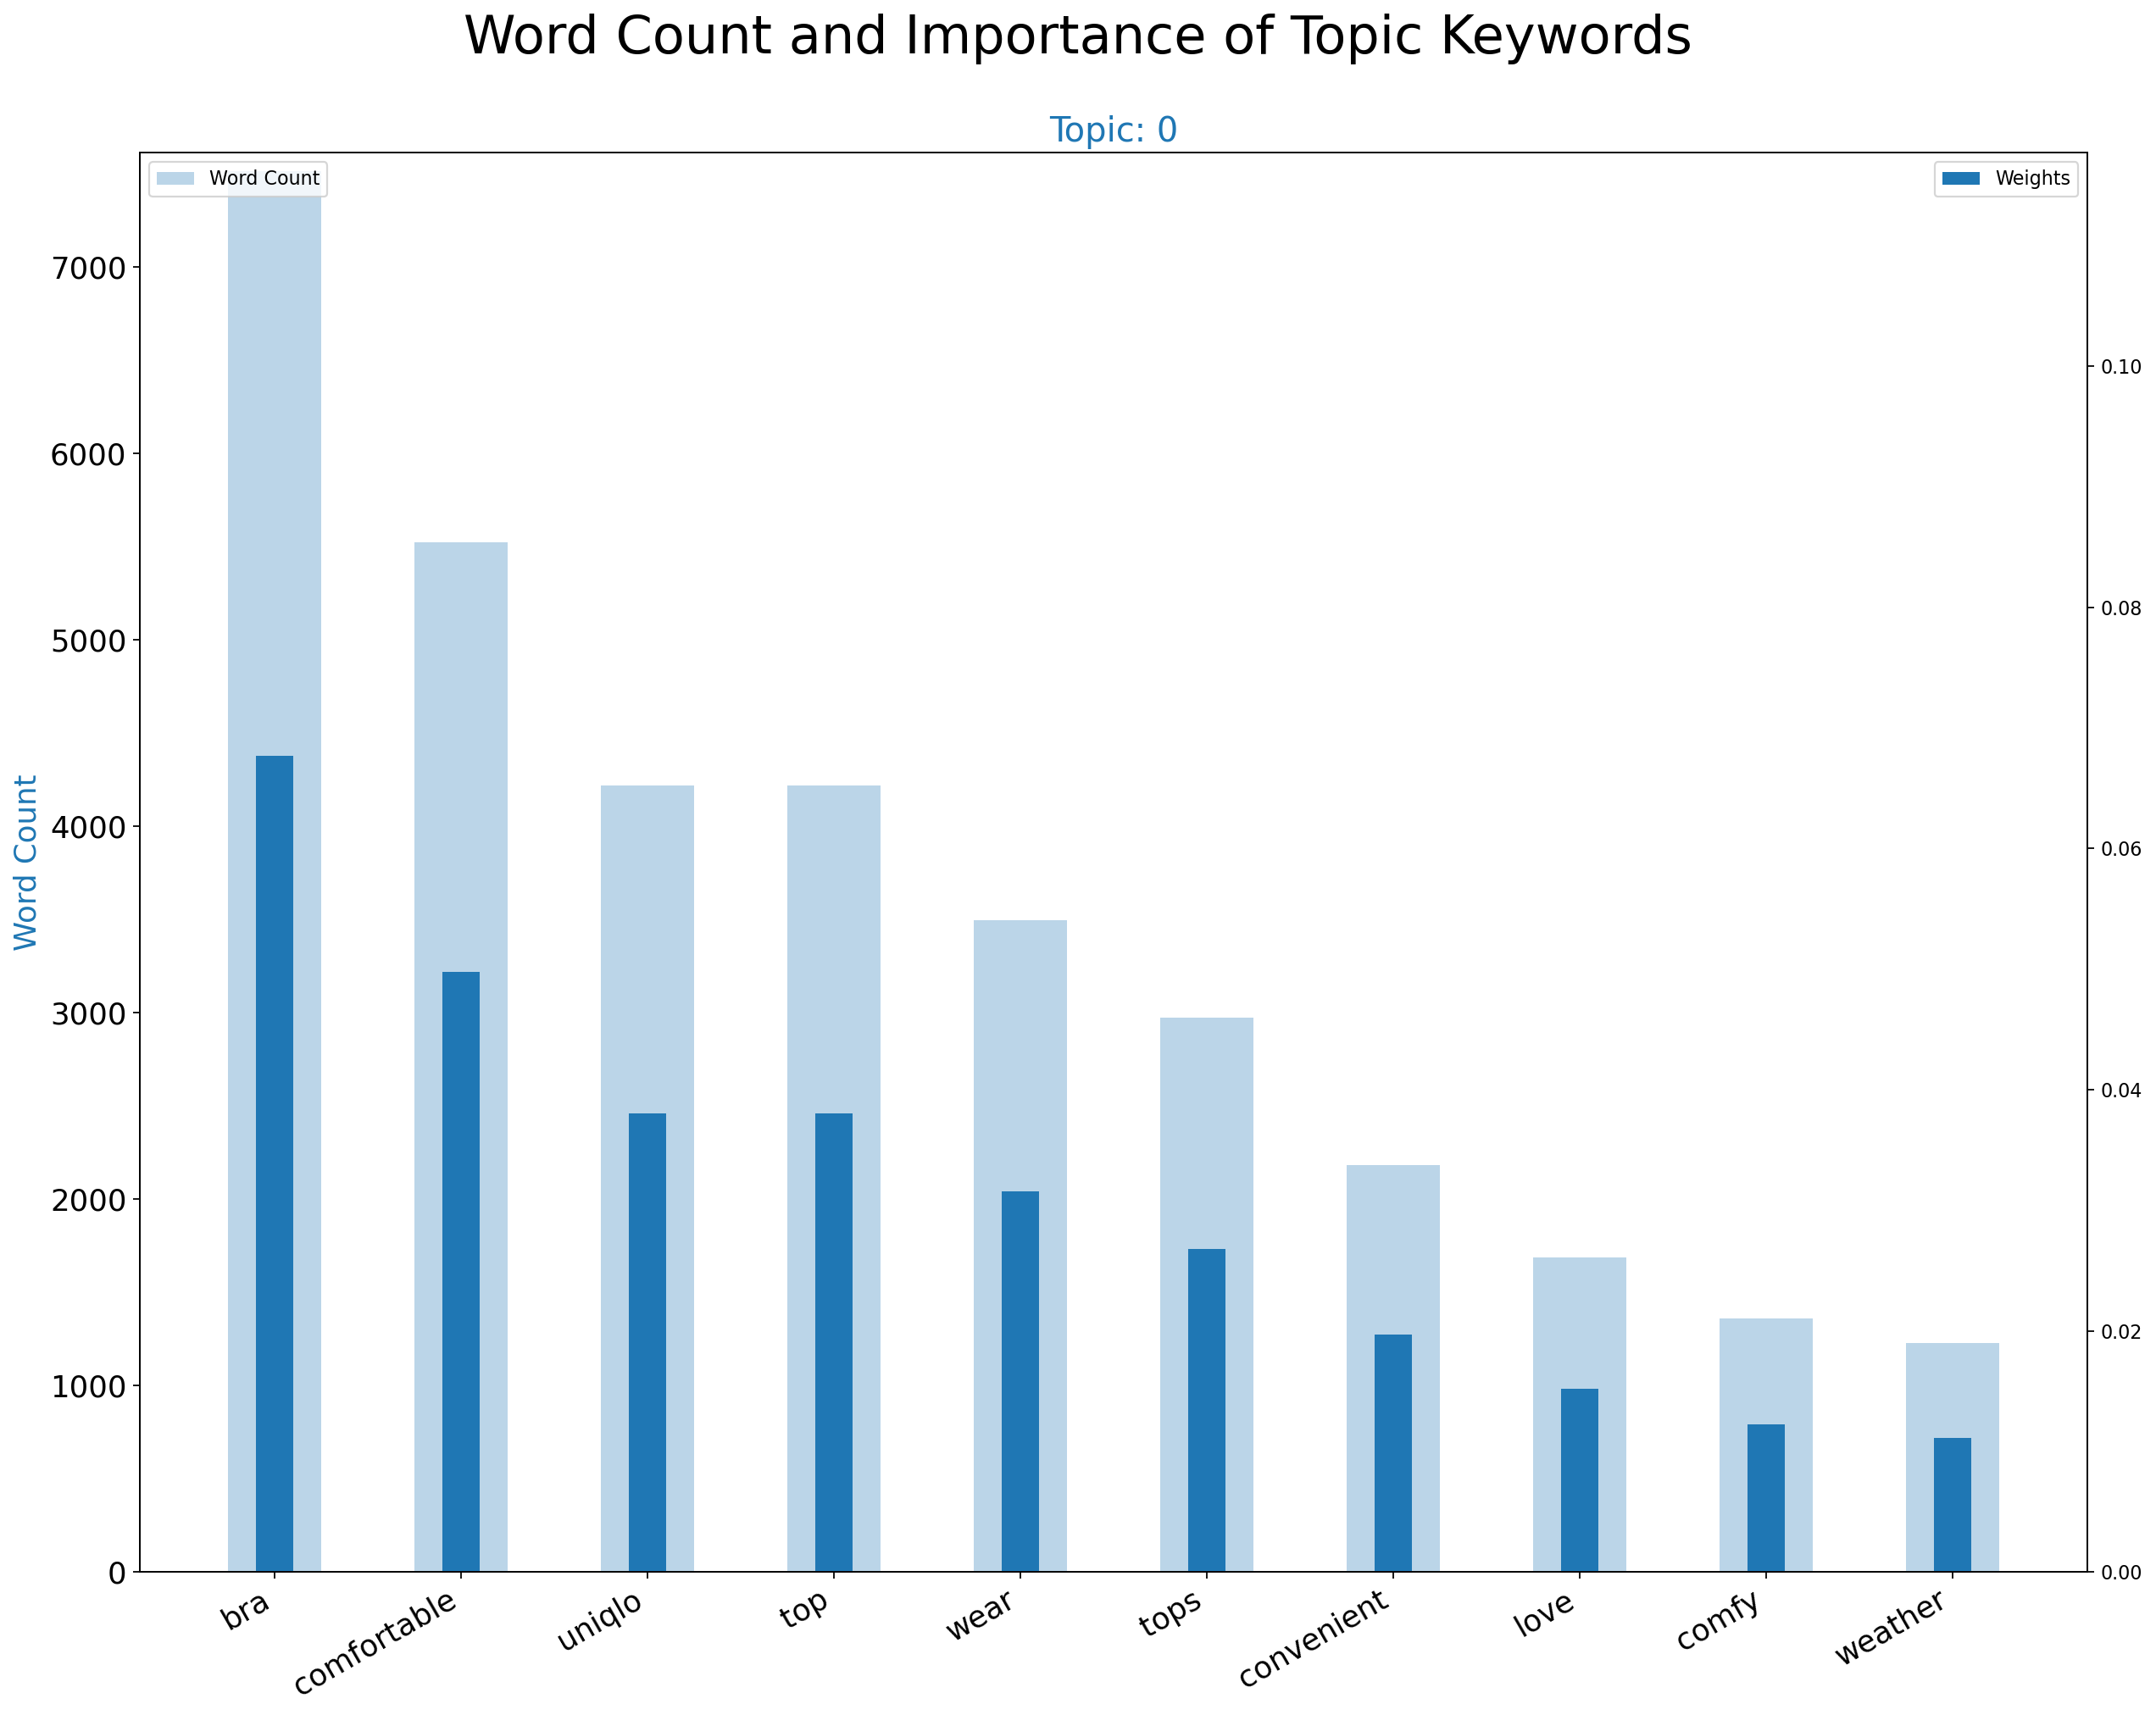

In [129]:
lda_graph(lda_result,dataWord,"Summer.png")

In [130]:
lda_autumn = TM_LDA(df_autumn)
lda_result = lda_autumn[0]
dataWord = lda_autumn[1]

C:\Users\lj.yew\AppData\Local\Temp\ipykernel_9492\2068525536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Processed Text' : 'Processed_Text'},inplace = True)


[(0,
  '0.028*"long" + 0.025*"bra" + 0.023*"sleeve" + 0.022*"uniqlo" + 0.018*"top" '
  '+ 0.017*"comfortable" + 0.017*"try" + 0.012*"team" + 0.010*"wear" + '
  '0.010*"love"')]


C:\Users\lj.yew\AppData\Local\Temp\ipykernel_9492\2114999170.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


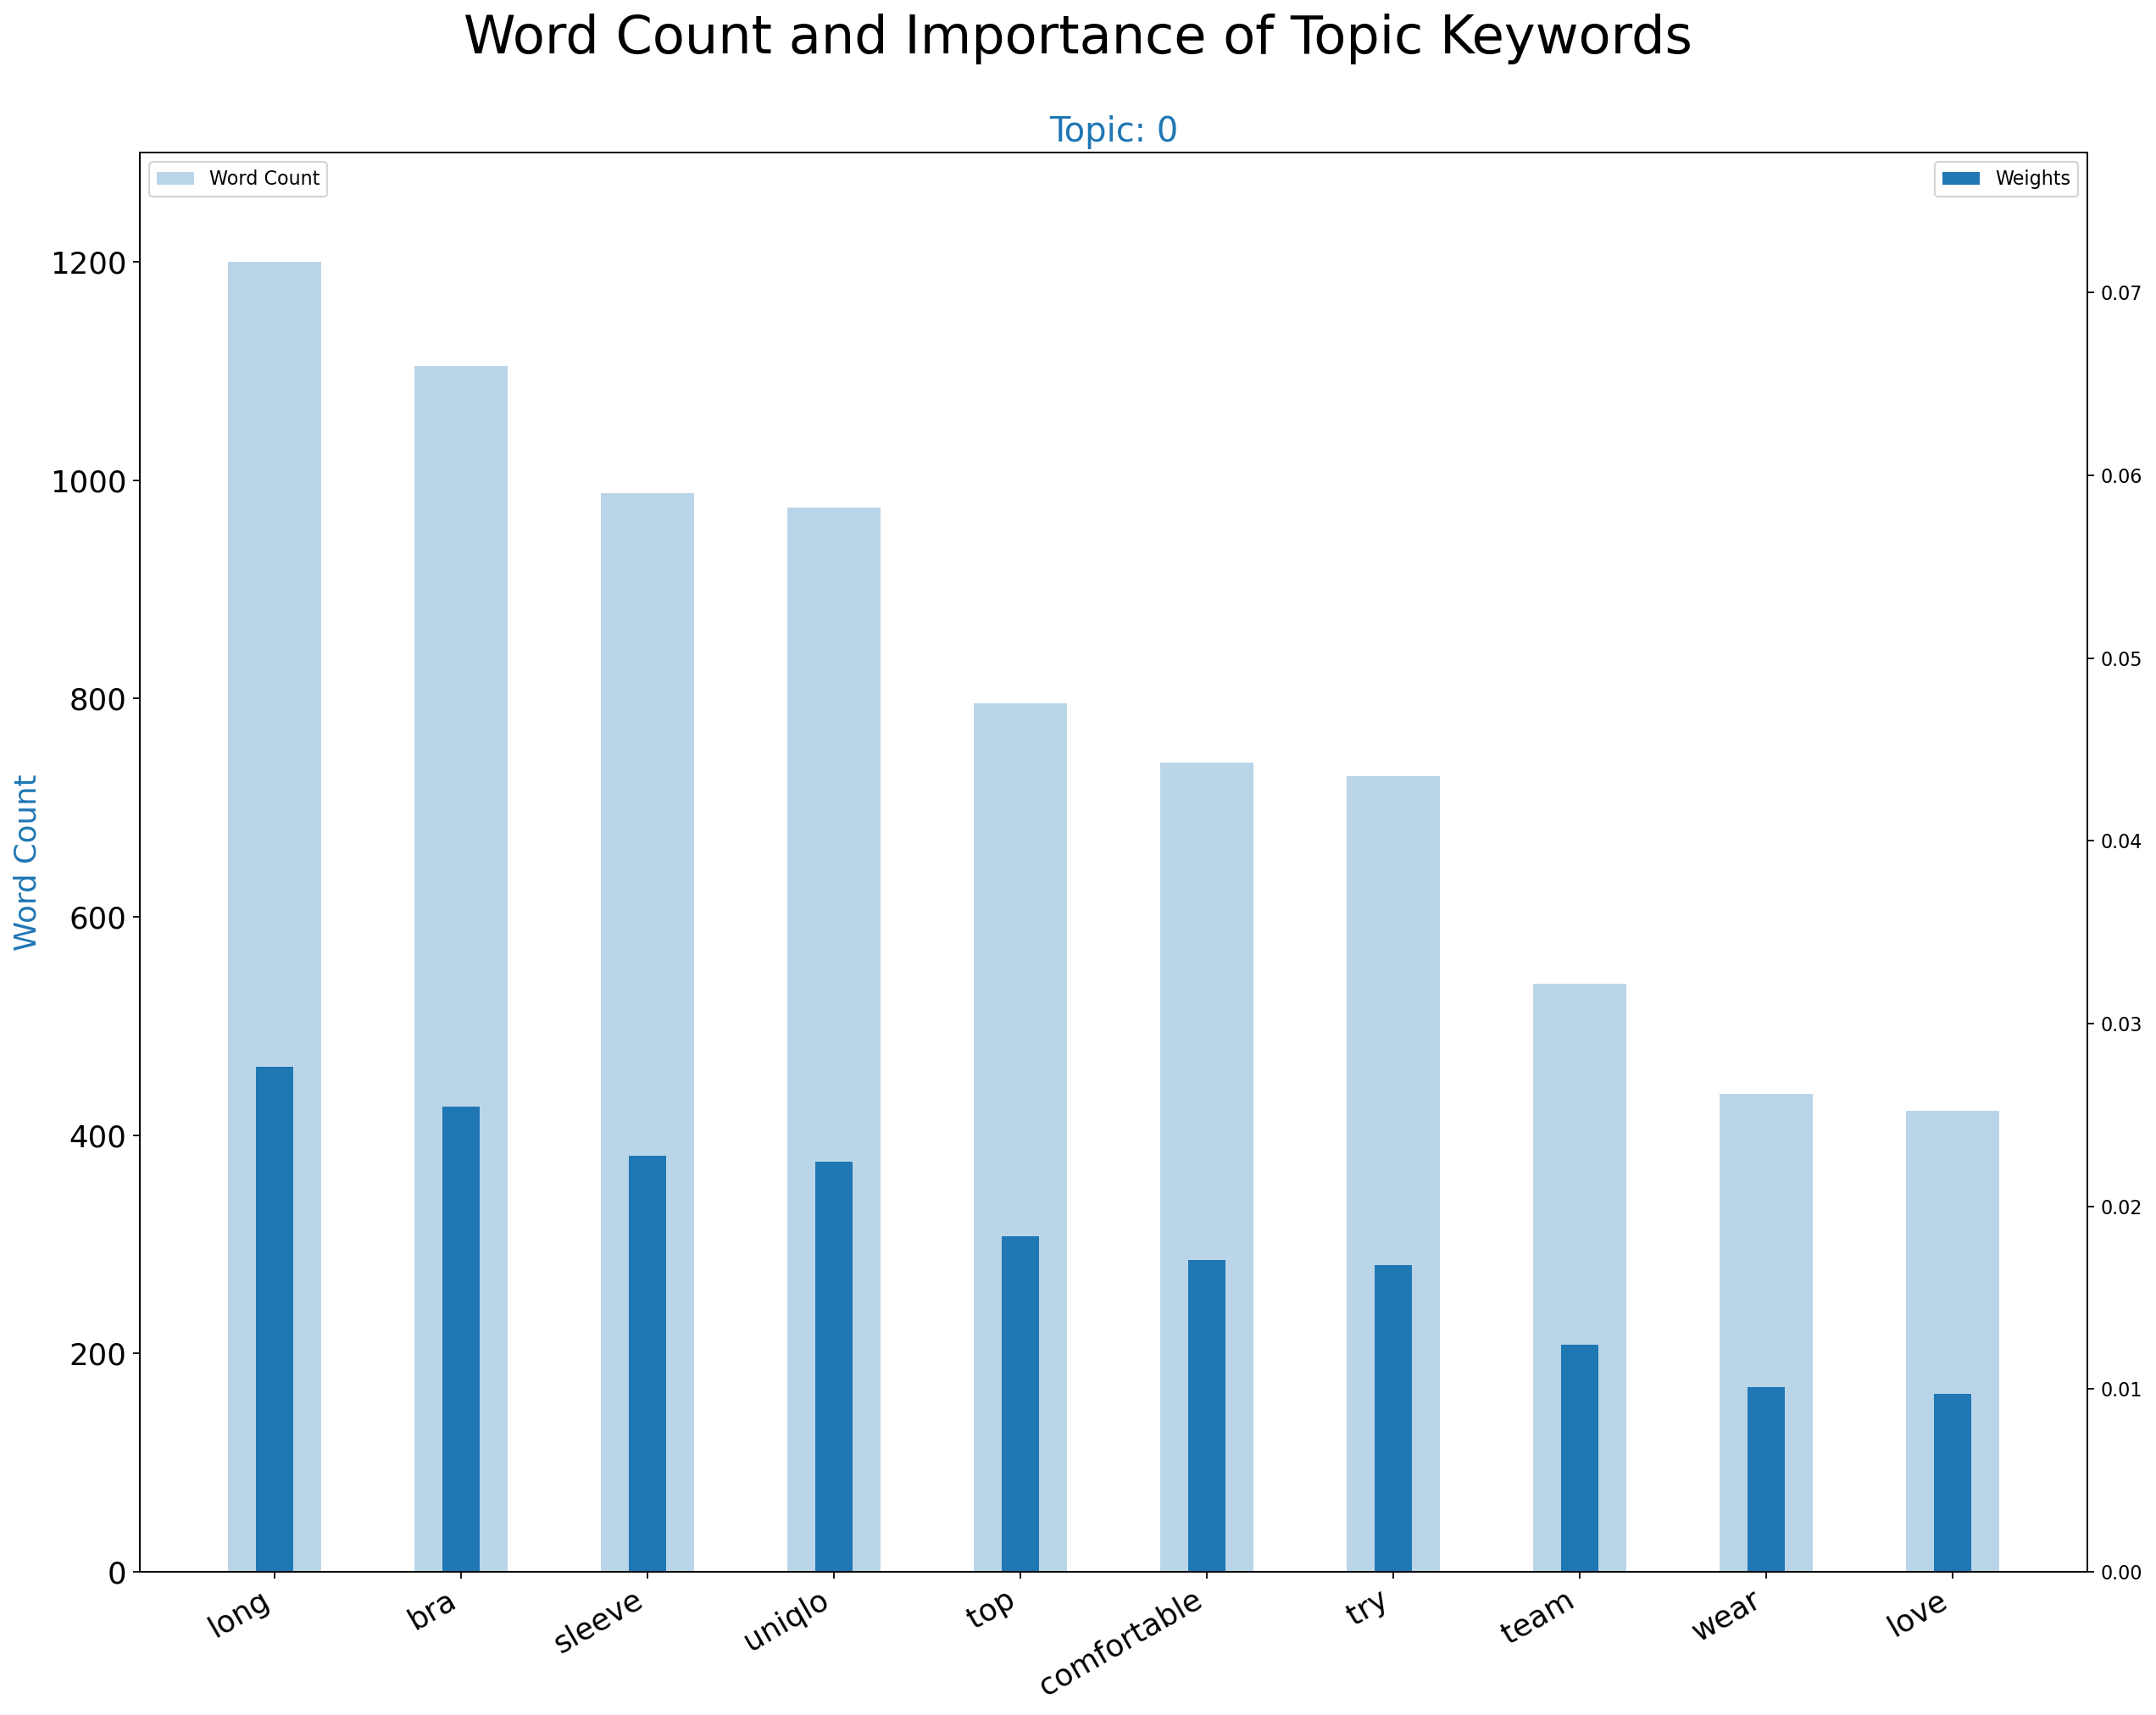

In [131]:
lda_graph(lda_result,dataWord,"Autumn.png")

In [132]:
lda_winter = TM_LDA(df_winter)
lda_result = lda_winter[0]
dataWord = lda_winter[1]

C:\Users\lj.yew\AppData\Local\Temp\ipykernel_9492\2068525536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Processed Text' : 'Processed_Text'},inplace = True)


[(0,
  '0.058*"beanie" + 0.024*"answer" + 0.014*"uniqlo" + 0.007*"hi" + 0.006*"us" '
  '+ 0.006*"love" + 0.006*"done" + 0.005*"let" + 0.005*"like" + 0.005*"one"')]


C:\Users\lj.yew\AppData\Local\Temp\ipykernel_9492\2114999170.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


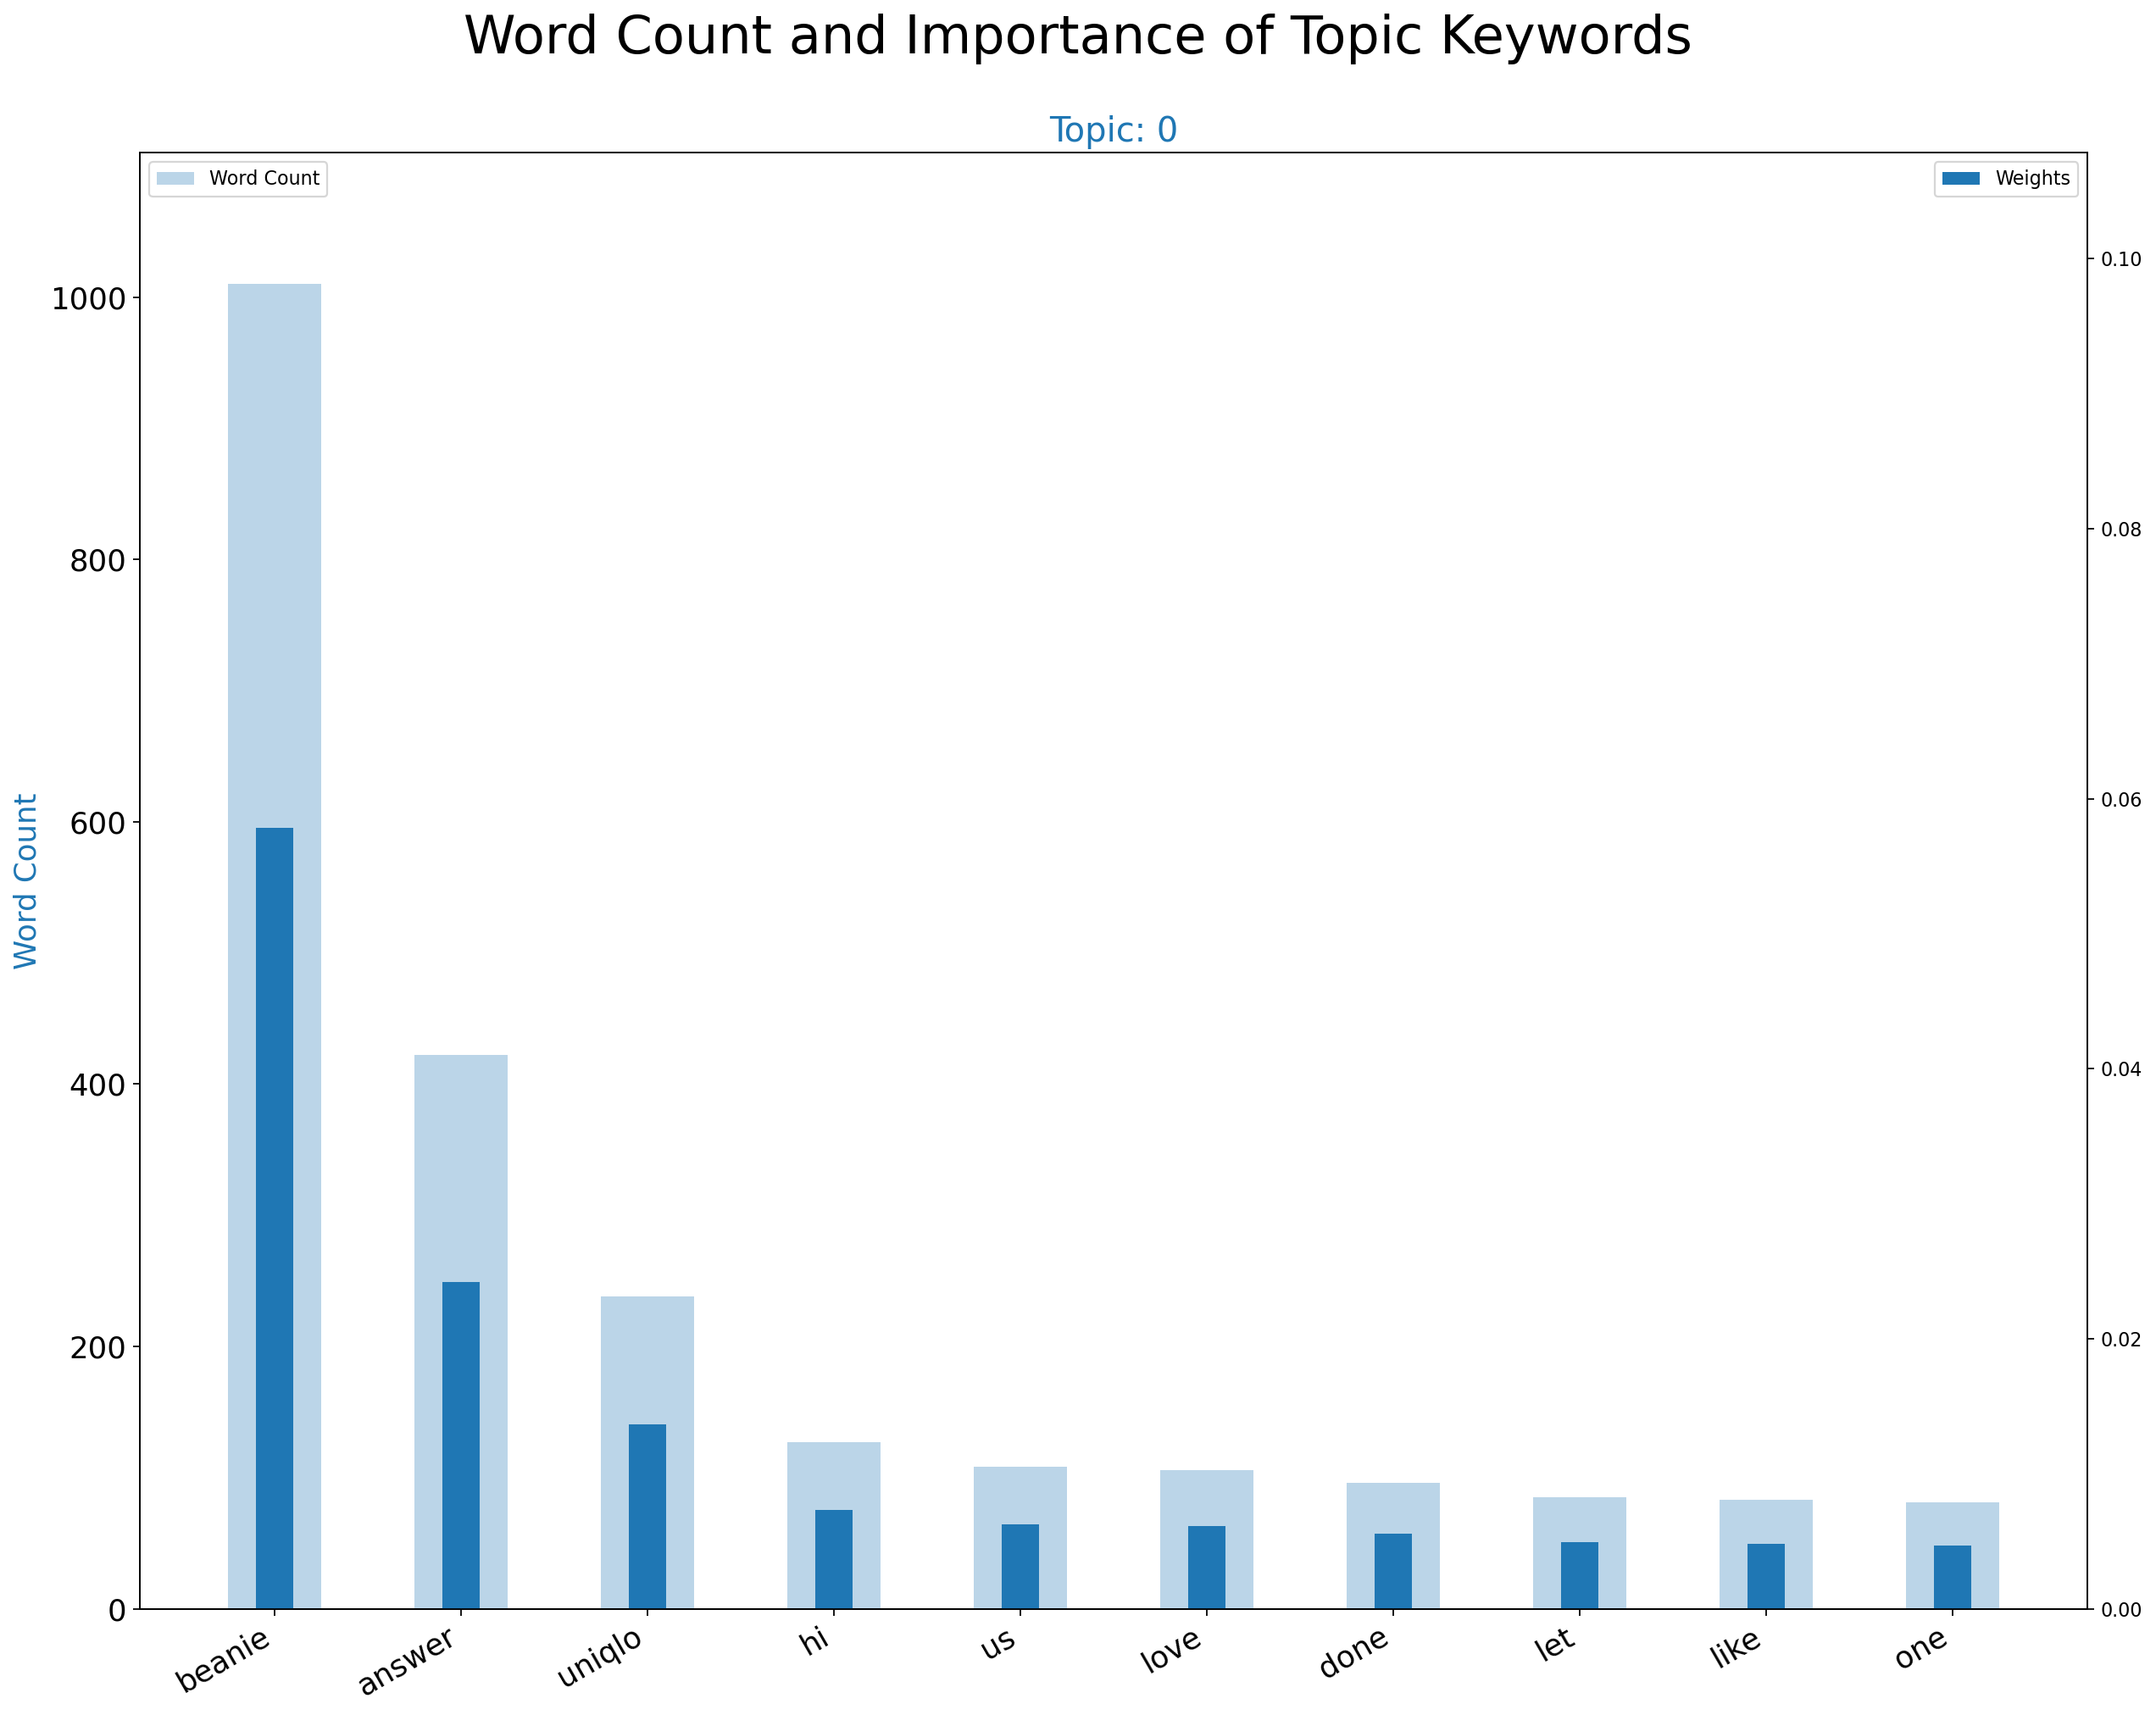

In [133]:
lda_graph(lda_result,dataWord,"Winter.png")